# Investigating the Cournot Model

## Table of Contents
- 1. [Introduction](#toc1_0) 
  - 1.1. [Imports](#toc1_1)  
- 2. [Duopoly Cornout Model](#toc2_0)  
  - 2.1. [Model Description](#toc2_1)  
  - 2.2. [Theoretical Solution](#toc2_2)
  - 2.3. [Numerical Solution](#toc2_3)  
- 3. [Re-Parametised Model: Different Marginal Costs](#toc3_0)   
- 4. [Extention: *N*-Firms](#toc4_0) 
- 4. [Conclusion](#toc5_0) 


## 1. <a id='toc1'></a>[Introduction](#toc0)

In this project we study a fundamental model of industrial organization: the **Cournot Model**.

The Cournot Model is an economic model in which competing firms of identical products compete on the quantity of output, rather than price. 

Our study departs from the explanation of the model's assumptions. We provide both a theoretical (generic) solution to the duopoly Cournot Model, as well as a numerical solution, in which we attribute numerical values to the parameters of the model. We then make a re-parameterisation of marginal costs to show how different marginal cost affect the firms in the model. Our analysis is finalised by extending the model from our duopoly *2*-firm model to an *n*-firm model. 

### 1.1. <a id='toc1_1'></a>[Imports](#toc0)

In [130]:
from types import SimpleNamespace
import numpy as np
import scipy as optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

from modelproject import CournotModel
from modelproject import NCournotModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



## 2. <a id='toc2_0'></a>[Duopoly Cournot Model](#toc0)



### 2.1. <a id='toc2_1'></a>[Model Description](#toc0)

The Cournot duopoly model describes how two firms in a market compete on output quantity rather than prices.
#### Assumptions:
* The market only consists of these two firms. *[This assumption will be dropped in Section 4.]*
* The firms produce homogeneous goods.
* Each firm maximizes its own profit, regarding the other firm output level.
* Firms are rational and choose quantity simultaneosly - static model.
* No collusion.
* Fixed marginal costs.
* Equal marginal costs across firms. *[This assumption will be dropped in Sections 3.and 4.]*

Firm 1 produces the output $q_1$ and firm 2 produces the output $q_2$.
The market price is $P(Q)=a-Q$ where $Q=q_1 + q_2$, or the total quantity in the market. The firms have the same marginal cost c, where $0\le c<a$.

Profit functions for the firms:

$\pi_1(q_1,q_2)= P(q_1+q_2)q_1 - cq_1$

$\pi_2(q_1,q_2)= P(q_1+q_2)q_2 - cq_2$

or

$\pi_1(q_1,q_2)= (a-q_1-q_2-c)q_1$

$\pi_2(q_1,q_2)= (a-q_1-q_2-c)q_2$


To solve the model we find the best-response functions for the firms to find the Nash Equilibrium. We take the first-order-condition for each firm with respect to their quantity and find:

Firm 1: $a - 2q_1-q_2-c=0 => q_1(q_2)=\frac{a-c-q_2}{2}$

Firm 2: $a-q_1-2q_2-c=0 => q_2(q_1)=\frac{a-c-q_1}{2}$

Which are the best-response functions.

For both firms, we get the best response quantity (equilibrium quantity for the other firm is marked with '*') :

$q_1=\frac{a-c-q^*_2}{2}$

$q_2=\frac{a-c-q^*_1}{2}$



So the Nash Equilibrium is:

$q^*_1=\frac{a-c-q^*_2}{2}$


$q^*_2=\frac{a-c-q^*_1}{2}$

Solving for $q^*_1$ and $q^*_2$:

$q^*_1=q^*_2=\frac{a-c}{3}$


### 2.2. <a id='toc2_2'></a>[Symbolic Solution](#toc0)

In [131]:
q1, q2, q, a, c = sm.symbols('q_1 q_2 q a c')    # Defining symbols

P = a - q1 -q2  #Inverse demand

profit1 = (P-c)*q1  #Profit functions
profit2 = (P-c)*q2

d_profit1 = sm.diff(profit1, q1)    #FOC for maximizing profit wrt q
d_profit2 = sm.diff(profit2, q2)

response1 = sm.solve([d_profit1], [q1])     #solving the FOC for best response functions
response2 = sm.solve([d_profit2], [q2])

**Pofit functions for each firm:**

In [132]:
print("Firm 1 profit function:")
display(profit1)

print("Firm 2 profit function:")
display(profit2)

Firm 1 profit function:


q_1*(a - c - q_1 - q_2)

Firm 2 profit function:


q_2*(a - c - q_1 - q_2)

**Best response functions for each firm:**

In [187]:
print("Firm 1 Best Response Function:")
display(sm.together(response1))

print("Firm 2 Best Response Function:")
display(sm.together(response2))

Firm 1 Best Response Function:


{q_1: (a - c - q_2)/2}

Firm 2 Best Response Function:


{q_2: (a - c - q_1)/2}

**Equilibrium Quantity:**

Given that marginal costs are the same for both firms we have a *SYMETRIC SOLUTION*, i.e. $q^*_1=q^*_2$.

Solving for $q^*_1$ and $q^*_2$ gives us:

 $q^*_1 = q^*_2 = (a-c)/3$

### 2.3. <a id='toc2_3'></a>[Numerical Solution](#toc0)

In [190]:
model = CournotModel(100, 20, 20)

equilibrium = model.find_nash_equilibrium()
print(f"Nash Equilibrium quantities: Firm 1: {equilibrium[0]}, Firm 2: {equilibrium[1]}")


Nash Equilibrium quantities: Firm 1: 26.666666666666664, Firm 2: 26.66666666666667


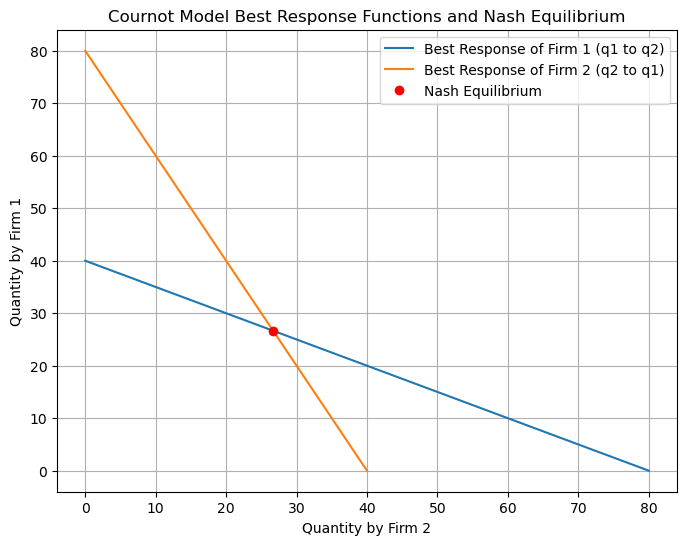

In [191]:
model.plot_model()

Here, we have plotted the best response functions for both firms. Where they intersect is the equilibrium quantity to produce.


## 3. <a id='toc3_0'></a>[Re-Parameterised Model: Different Marginal Costs](#toc0)

Now we wan't to see what happens if one of the initial assumptions of the Cournot model changes: firms no longer have the same marginal cost.

In this case we will assume that firm 1 has lower marginal costs of production than firm 2, i.e. firm 1 is more cost-efficient.  

**New Assumptions:**

 - $c_1 \neq c_2 \neq c$
 -  $ c_1 < c_2 $ 

In [197]:
model = CournotModel(100, 20, 35)

equilibrium = model.find_nash_equilibrium()
print(f"Nash Equilibrium quantities: Firm 1: {equilibrium[0]}, Firm 2: {equilibrium[1]}")

Nash Equilibrium quantities: Firm 1: 31.666666666666668, Firm 2: 16.666666666666668


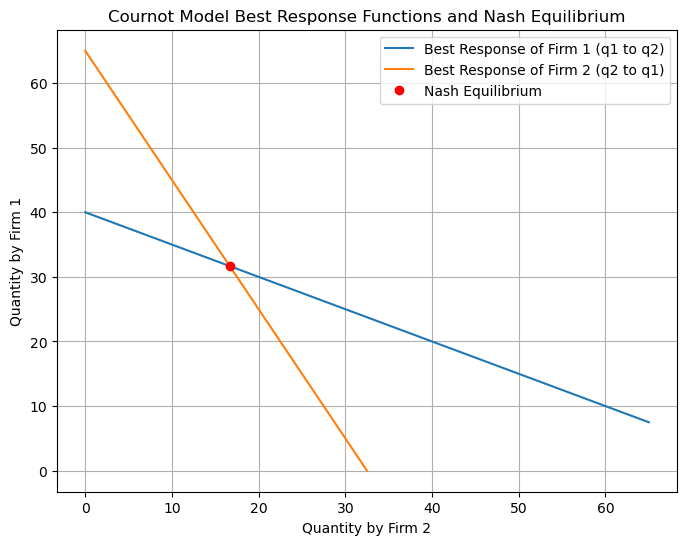

In [198]:
model.plot_model()

As we can see, we no longer have: $q^*_1=q^*_2$ , this means that with different marginal costs we have an *ASSYMETRIC SOLUTION*.

The new equilibrium - given by the interception of the best-response functions - is different from the previous NE. As firm 1 is now more efficient in production, now it produces more than firm 2. 


## 4. <a id='toc4_0'></a>[Extension: *N*-Firms](#toc0)

In this section, we extend the Cournot model to accommodate a market with `n` competing firms. 

In extending the Cournot model to an n-firm scenario, each firm's output decision now depends on the combined output of $n-1$ other firms. The equilibrium is found where each firm's output, when substituted into the market demand equation, no longer incentivizes any firm to unilaterally change its output. Hence the new best response fuction for each firm *i* is:

$$q_i = \frac{a - c_i - \sum_{j \neq i} q_j}{n + 1}$$

Where:
- $q_i$ is the output of firm *i*.
- $c_i$ is the marginal cost of firm *i*.
- $n$ is the number of firms.

A new class on the modelproject.py file was created to expand the model for *n*-firms: NCournotModel. We maintain the assumption of different Marginal Costs across firms. To select the number of firms and the marginal costs we have made a random selection. 

In [199]:
import random

# Initialize parameters
a = 100

# Set the seed for reproducibility
random.seed(45) 
np.random.seed(45)

num_firms = random.randint(2, 20)  # Number of firms will be random: between 2 to 20 firms
costs = np.random.uniform(low=1, high=50, size=num_firms)  # We also keep the different MC across firms assumption, which are randomly atrributed as well: between 1 and 50

print("Number of Firms:", num_firms)
print("Each firms' MC are:",costs)

Number of Firms: 10
Each firms' MC are: [49.46156416 27.92769162 14.7909178   4.78718874 22.7790053  24.16759052
  3.37757804  9.00289796  6.68158486 31.74219245]


In [200]:
# Create an instance of NCournotModel
model = NCournotModel(a, costs)

# Initial guesses for quantities
initial_guesses = np.random.rand(num_firms) * 10  # Random initial quantities for each firm

# Finding the Nash equilibrium
equilibrium_quantities = model.find_nash_equilibrium(initial_guesses)
print("Nash Equilibrium Quantities:", equilibrium_quantities)

Nash Equilibrium Quantities: [1.02743464 3.1808219  4.49449928 5.49487218 3.69569053 3.55683201
 5.63583325 5.07330126 5.30543257 2.79937181]


As we now are considering *n*-firms, in which n>2, plotting the best response fuctions would be impossible if we go beyond 3-dimensions. Consequently, below we plot the Equilibrium Quantities for each firm *i*, together with the marginal costs of each firm *i*. Plotting these two variables together allows for an analysis based on economic intuition. 

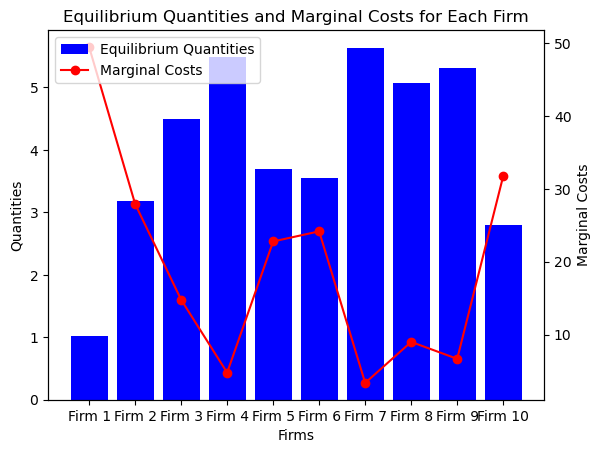

In [201]:
model.plot_equilibrium_quantities(equilibrium_quantities)

From this graph we can see that firms with higher marginal costs tend to produce less, as they are less cost-efficient in their production. This was also verified in the 2-firm model. This result makes sense intuitively, because firms with higher marginal costs face higher costs per unit of output, which reduces their profitability. Consequently, they are incentivized to produce less in order to maximize their profits, aligning with the basic principles of profit maximization in economics.

## 5. <a id='toc5_0'></a>[Conclusion](#toc0)

In this Cournot Model Analysis, we have provided the solution to a firms' optimisation problem theoretically and empirically under an **identical firm duopoly**, a **duopoly under alternate marginal costs**, and when faced with ***n*-firm competition**. 

Our main findings reveal that, within the framework of the Cournot Model, a firm's production quantity is  influenced by not only its own marginal costs but also those of its competitors. Moreover, our analysis highlights the  impact of market competition on firms' production decisions.